In [1]:
import numpy as np
import matplotlib.pyplot as plt


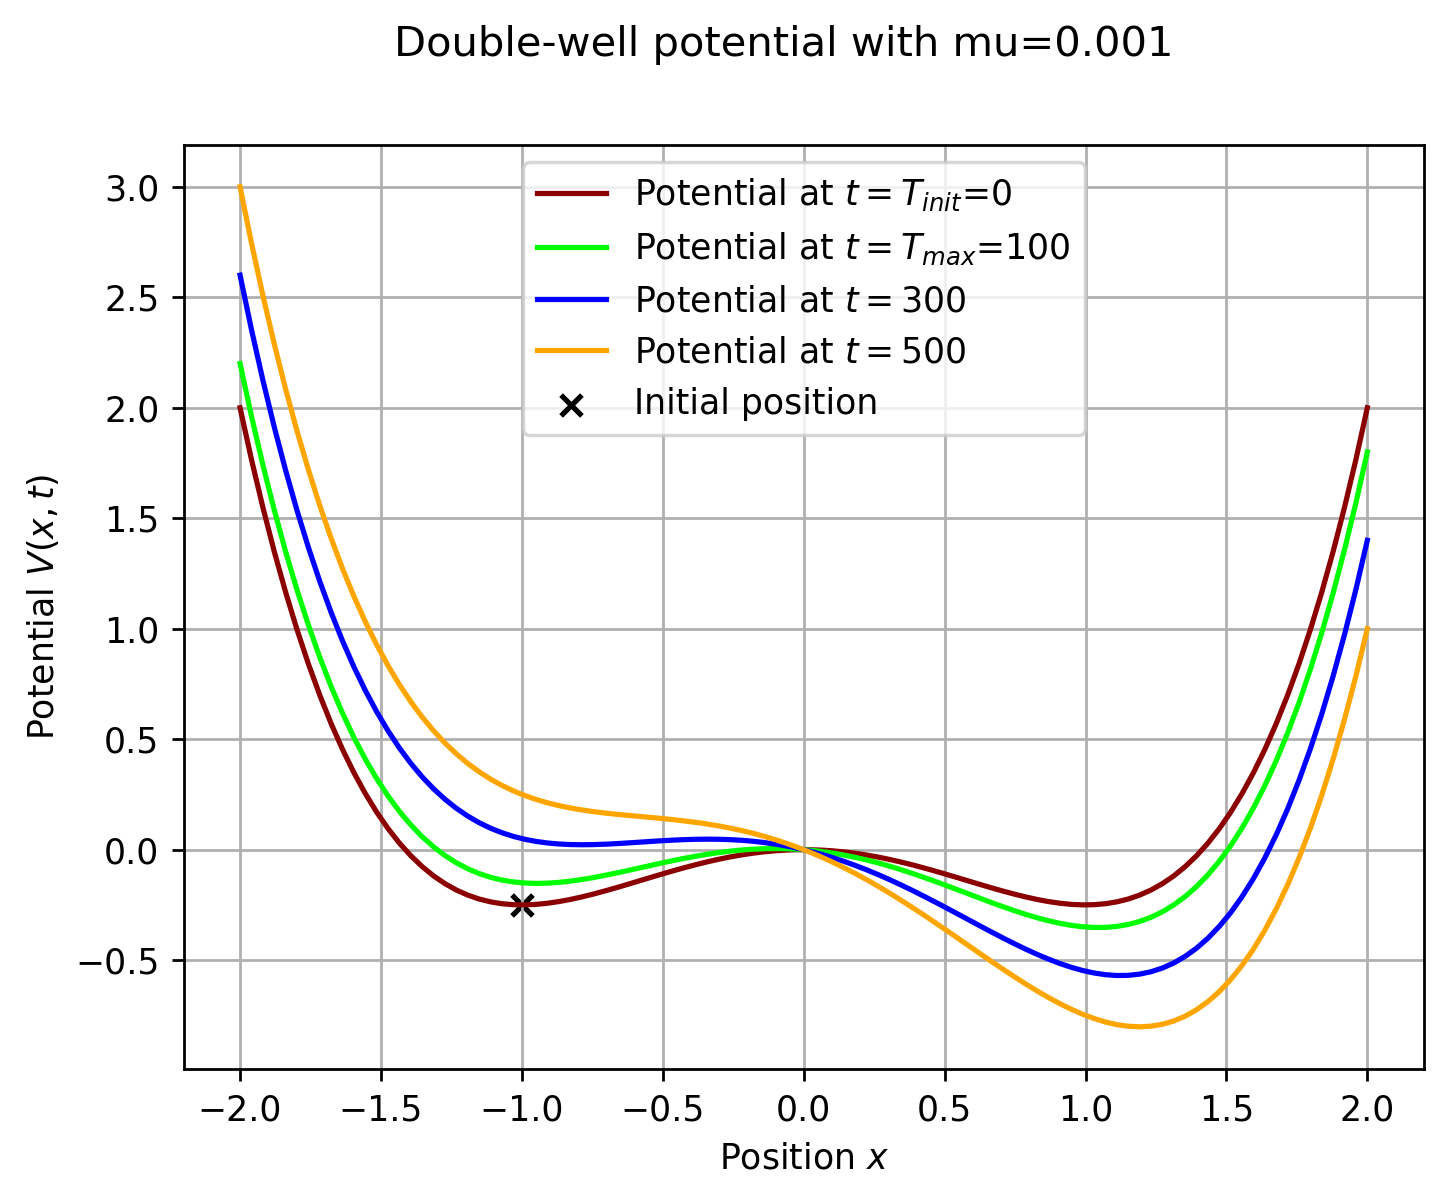

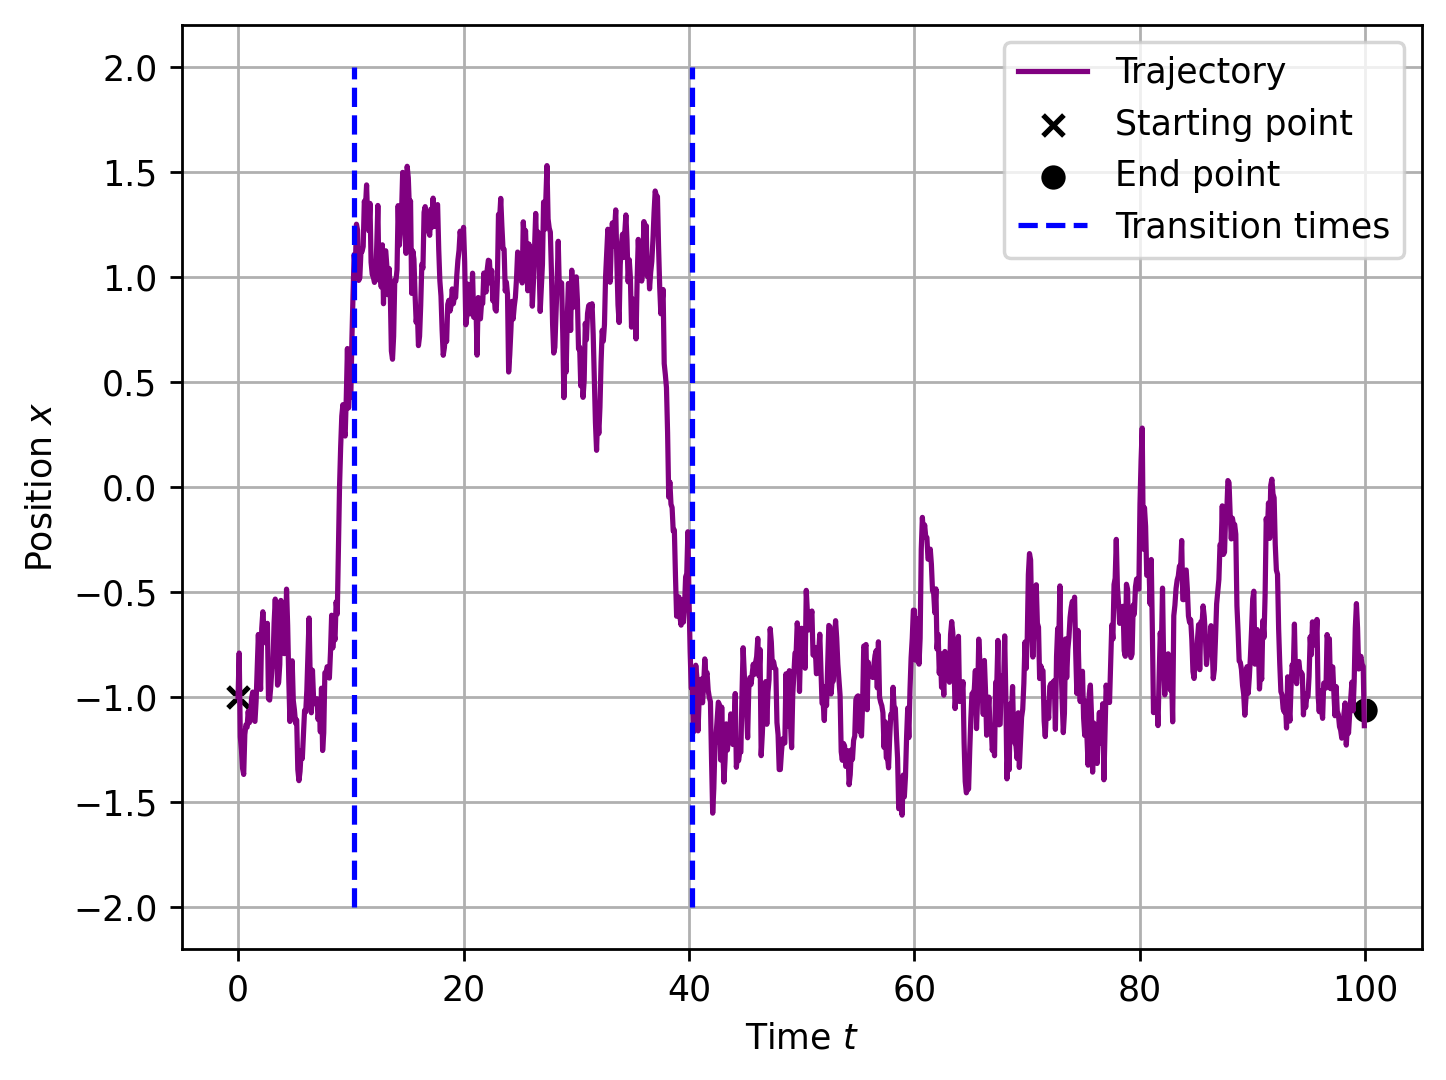

In [2]:

# Define the modified double-well potential
def potential(x, t, mu):
    return 0.25 * x**4 - 0.5 * x**2 - mu * x * t

# Define the force derived from the potential
def force(x, t, mu):
    return -x**3 + x + mu * t

# Euler-Maruyama update for X
def euler_maruyama(x, t, dt, mu, g=0.1):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(dt))
    x_new = x + force(x, t, mu) * dt + g * noise
    t_new = t + dt
    return x_new, t_new

# Run the simulation
def run_simulation(x0, t0, dt, T_max, mu, g=0.1, print_transitions=False,seed=42):
    np.random.seed(seed)
    n_steps = int(T_max / dt)
    x_traj = np.zeros(n_steps)
    t_traj = np.zeros(n_steps)
    x = x0
    t = t0
    transition_times=[]
    transit_at = -x0
    for i in range(n_steps):
        x_traj[i] = x
        t_traj[i] = t
        x, t = euler_maruyama(x, t, dt, mu, g)
        if np.abs(x-transit_at) < 1e-2:
            if print_transitions:
                print(f"Transition to {transit_at:.1f} at t={t:.2f}")
            transition_times.append(t)
            transit_at = -transit_at
    return x_traj, t_traj, np.array(transition_times)

def run_multiple_simulations(N, x0, t0, dt, T_max, mu, g=0.1):
    transition_counts = 0
    for seed in range(N):
        _, _, transition_times = run_simulation(x0, t0, dt, T_max, mu, g, print_transitions=False, seed=seed)
        if len(transition_times) > 0:
            transition_counts += 1
    transition_probability = transition_counts / N
    return transition_probability


# Parameters
x0 = -1.0    # Initial position: start from left equilibrium
t0 = 0.0     # Initial time
dt = 0.01    # Time step size
T_max = 100  # Total simulation time
g=0.5	# Noise strength
mu=0.001   # Parameter: time-dependence of potential

# Run the simulation
x_traj, t_traj,transition_times = run_simulation(x0, t0, dt, T_max, mu, g)


# Plotting the potential
x=np.linspace(-2.0, 2.0, 100)
fig,ax=plt.subplots((1),dpi=250)
fig.suptitle('Double-well potential with mu='+f'{mu:.3f}')
ax.plot(x, potential(x, t0, mu), label=r'Potential at $t=T_{init}$'+f'={t0:.0f}',color='darkred')
ax.plot(x, potential(x, T_max, mu), label=r'Potential at $t=T_{max}$'+f'={T_max:.0f}',color='lime')
ax.plot(x, potential(x, 3*T_max, mu), label=r'Potential at $t=$'+f'{3*T_max:.0f}',color='blue')
ax.plot(x, potential(x, 5*T_max, mu), label=r'Potential at $t=$'+f'{5*T_max:.0f}',color='orange')
ax.scatter(x0, potential(x0, t0, mu), marker='x',label='Initial position',color='black')
ax.set_ylabel(r'Potential $V(x,t)$')
ax.set_xlabel(r'Position $x$')
ax.legend()
ax.grid(True)
plt.show()


# Plotting the trajectory
fig,ax=plt.subplots((1),dpi=250)
j=10
ax.plot(t_traj[::j],x_traj[::j],label='Trajectory',color='purple')
ax.scatter(t_traj[0],x_traj[0],label='Starting point',color='black',marker='x')
ax.scatter(t_traj[-1],x_traj[-1],label='End point',color='black',marker='o')
ax.vlines(transition_times, -2, 2, color='blue', linestyle='dashed',label='Transition times')
ax.legend()
ax.grid(True)
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
plt.show()



In [3]:

# Parameters
N = 100     # Number of simulations for each parameter set
x0 = -1.0    # Initial position: start from left equilibrium
t0 = 0.0     # Initial time
g=0.1	# Noise strength: fixed
dt = np.arange(0.01,0.11,0.01)    # Time step size
dt=0.01
T_max = np.arange(10,110,10)  # Total simulation time
mu=np.arange(0.001,0.011,0.001)   # Parameter: time-dependence of potential

results_probability = np.zeros((len(T_max), len(mu)))
for T in T_max:
    for m in mu:
        transition_probability = run_multiple_simulations(N, x0, t0, dt, T, m, g)
        results_probability[T//10-1][int(m*1000)-1] = transition_probability





KeyboardInterrupt: 

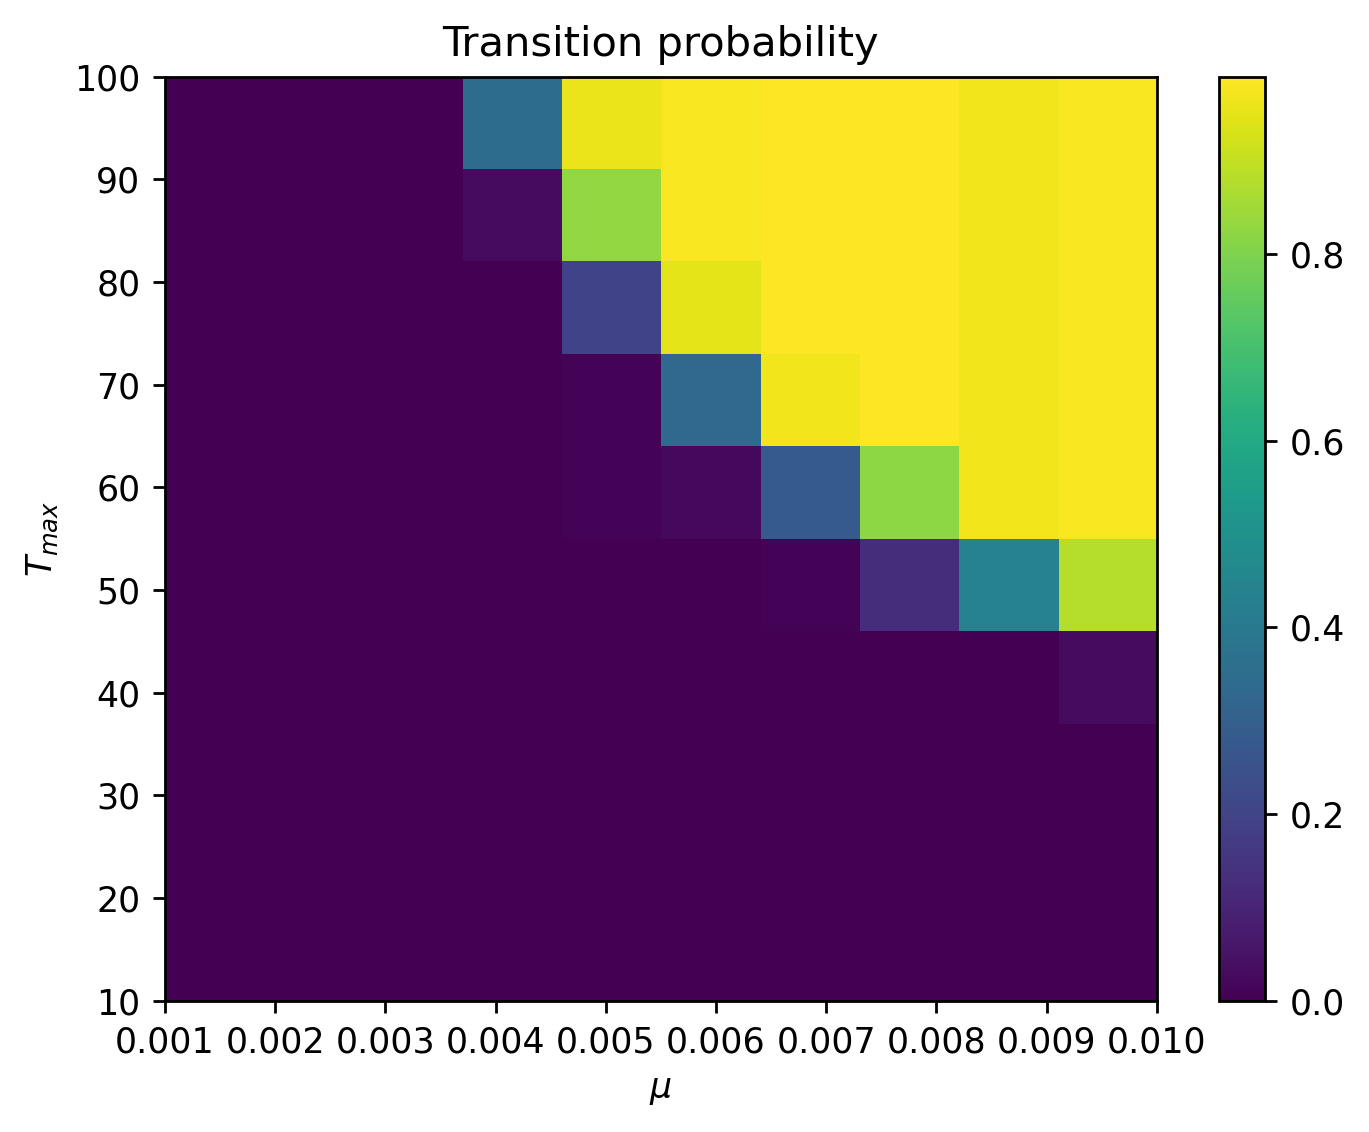

In [68]:

# Plotting the results
fig,ax=plt.subplots((1),dpi=250)
c=ax.imshow(results_probability, cmap='viridis',origin='lower', extent=[mu[0], mu[-1], T_max[0], T_max[-1]], aspect='auto')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$T_{max}$')
ax.set_title('Transition probability')
cbar = fig.colorbar(c, ax=ax)

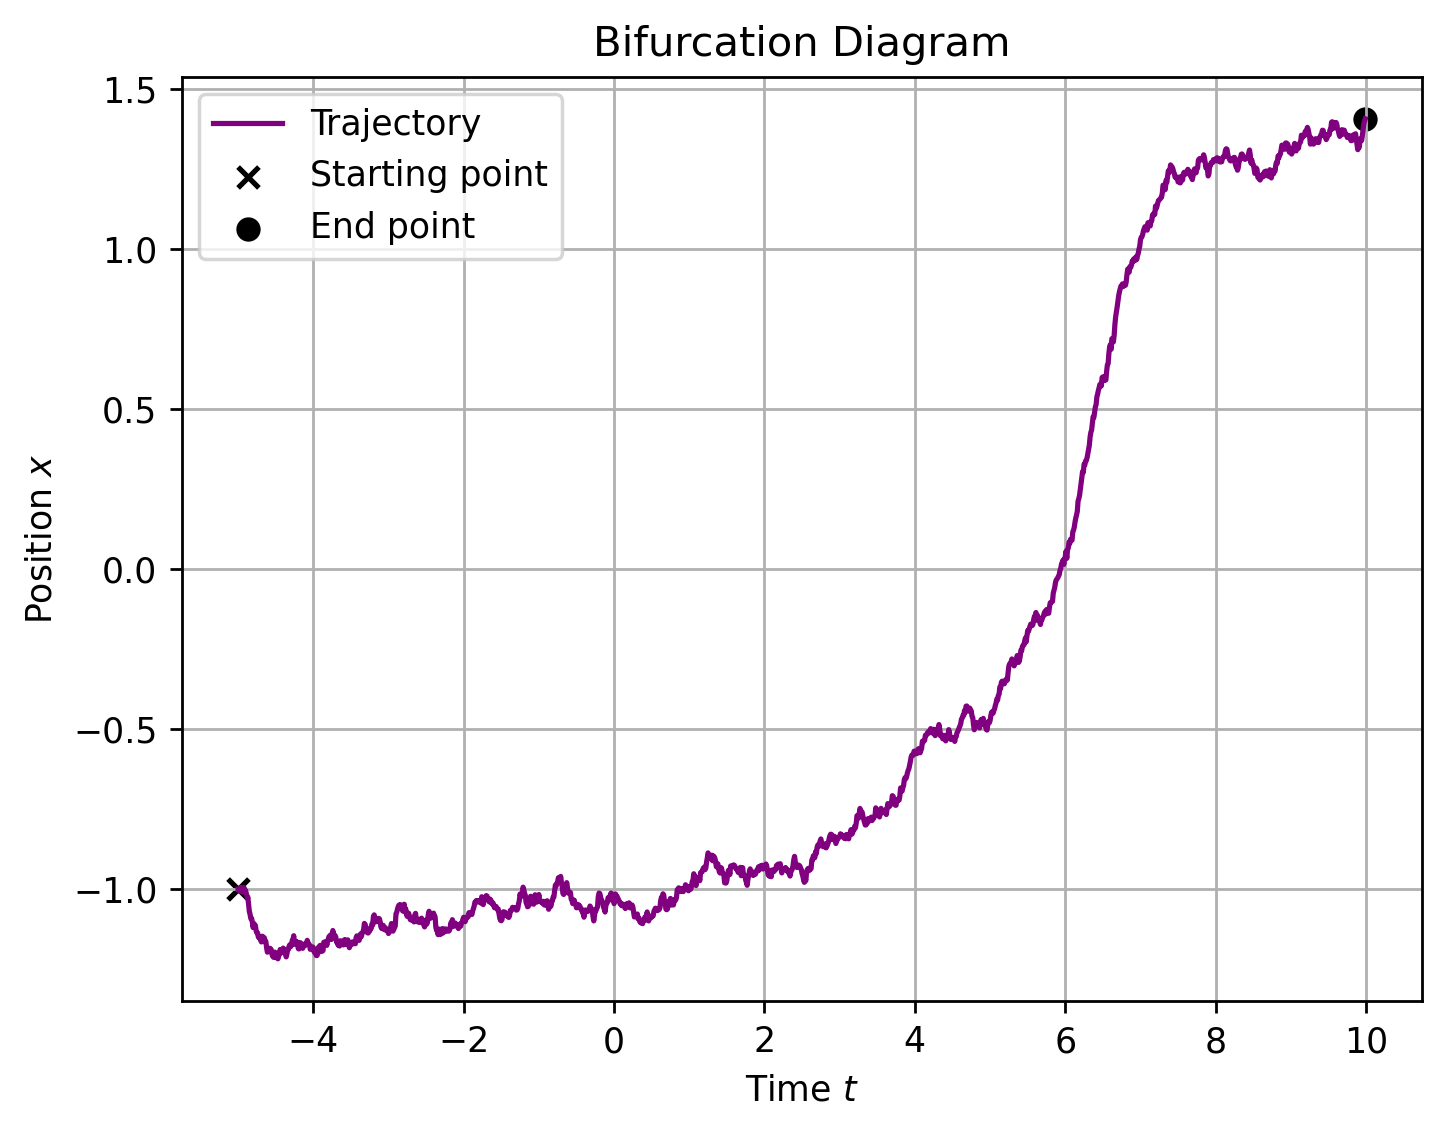

In [73]:
# Parameters for bifurcation diagram
mu_bifurcation = 0.1
g_bifurcation = 0.1
x0_bifurcation = -1.0
t0_bifurcation = -5.0  # Start time at t = -5
dt_bifurcation = 0.01
T_max_bifurcation = 15  # Total simulation time to cover t = -5 to t = 10

# Run the simulation for bifurcation diagram
x_traj_bifurcation, t_traj_bifurcation, _ = run_simulation(x0_bifurcation, t0_bifurcation, dt_bifurcation, T_max_bifurcation, mu_bifurcation, g_bifurcation)

# Plotting the bifurcation diagram
fig, ax = plt.subplots(dpi=250)
ax.plot(t_traj_bifurcation, x_traj_bifurcation, label='Trajectory', color='purple')
ax.scatter(t_traj_bifurcation[0], x_traj_bifurcation[0], label='Starting point', color='black', marker='x')
ax.scatter(t_traj_bifurcation[-1], x_traj_bifurcation[-1], label='End point', color='black', marker='o')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title('Bifurcation Diagram')
ax.legend()
ax.grid(True)
plt.show()

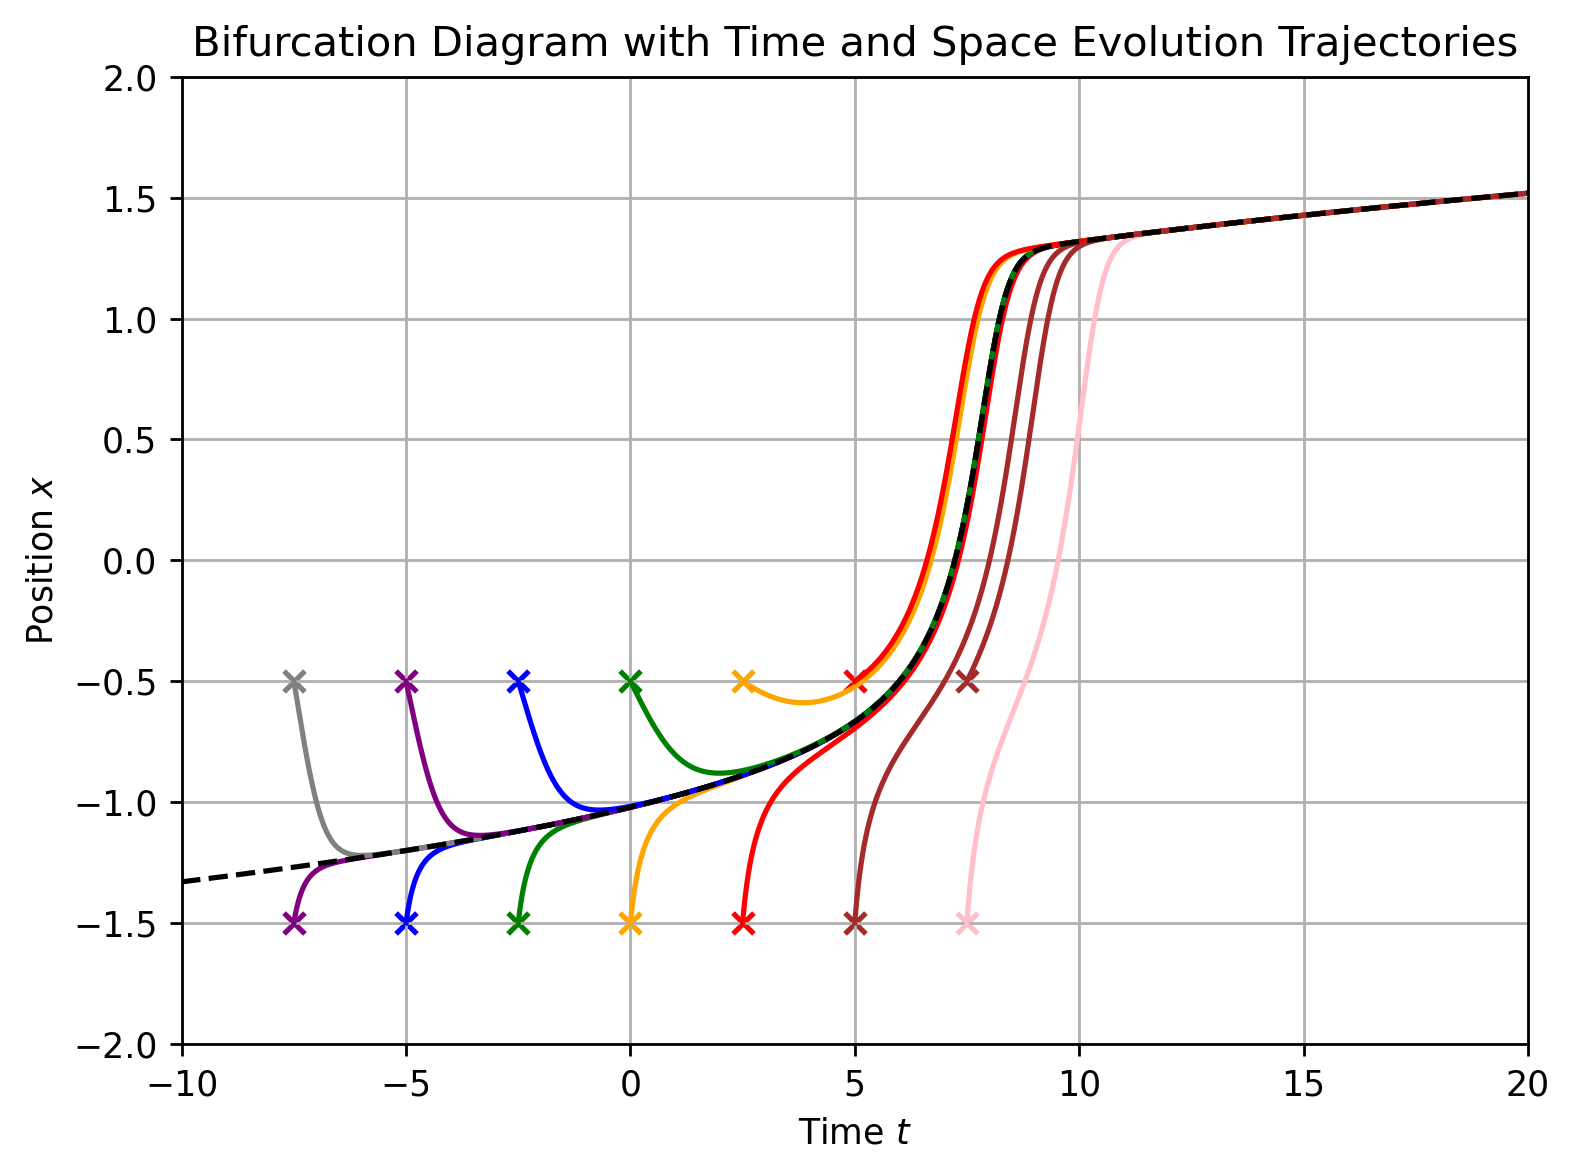

In [4]:
# Parameters for bifurcation diagram
mu_bifurcation = 0.1
g_bifurcation = 0
dt_bifurcation = 0.01
T_max_bifurcation = 15  

# Different initial conditions for both time and space
initial_positions = [-1.5, -0.5]  # Initial positions (space)
initial_times = np.array([-7.5,-5.0, -2.5, 0.0, 2.5,5.0,7.5])  # Initial times (time)

# Plotting the bifurcation diagram with multiple time evolution trajectories
fig, ax = plt.subplots(dpi=250)

colors = ['purple', 'blue', 'green', 'orange', 'red', 'brown', 'pink', 'gray']  # Colors for different trajectories
color_index = 0  # Index to cycle through colors

# Loop over initial conditions for both time and space
for x0_bifurcation in initial_positions:
    for t0_bifurcation in initial_times:
        # Run the simulation for each combination of initial position and initial time
        x_traj_bifurcation, t_traj_bifurcation, _ = run_simulation(x0_bifurcation, t0_bifurcation, dt_bifurcation, T_max_bifurcation, mu_bifurcation, g_bifurcation)
        
        # Plot each trajectory with a different color
        ax.plot(t_traj_bifurcation, x_traj_bifurcation, label=f'x0={x0_bifurcation}, t0={t0_bifurcation}', color=colors[color_index % len(colors)])
        
        # Mark the starting and ending points
        ax.scatter(t_traj_bifurcation[0], x_traj_bifurcation[0], color=colors[color_index % len(colors)], marker='x')
        #ax.scatter(t_traj_bifurcation[-1], x_traj_bifurcation[-1], color='black', marker='o')
        
        # Update color index for the next trajectory
        color_index += 1

# Plotting
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title('Bifurcation Diagram with Time and Space Evolution Trajectories')
x_pb,t_pb,_ = run_simulation(x0=-5.0, t0=-100.0, dt=0.01, T_max=150, mu=mu_bifurcation, g=0)
ax.plot(t_pb,x_pb,label='t0->-infty',color='black',linestyle='dashed')
ax.set_xlim(-10,20)
ax.set_ylim(-2,2)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
ax.grid(True)
plt.tight_layout()
plt.show()


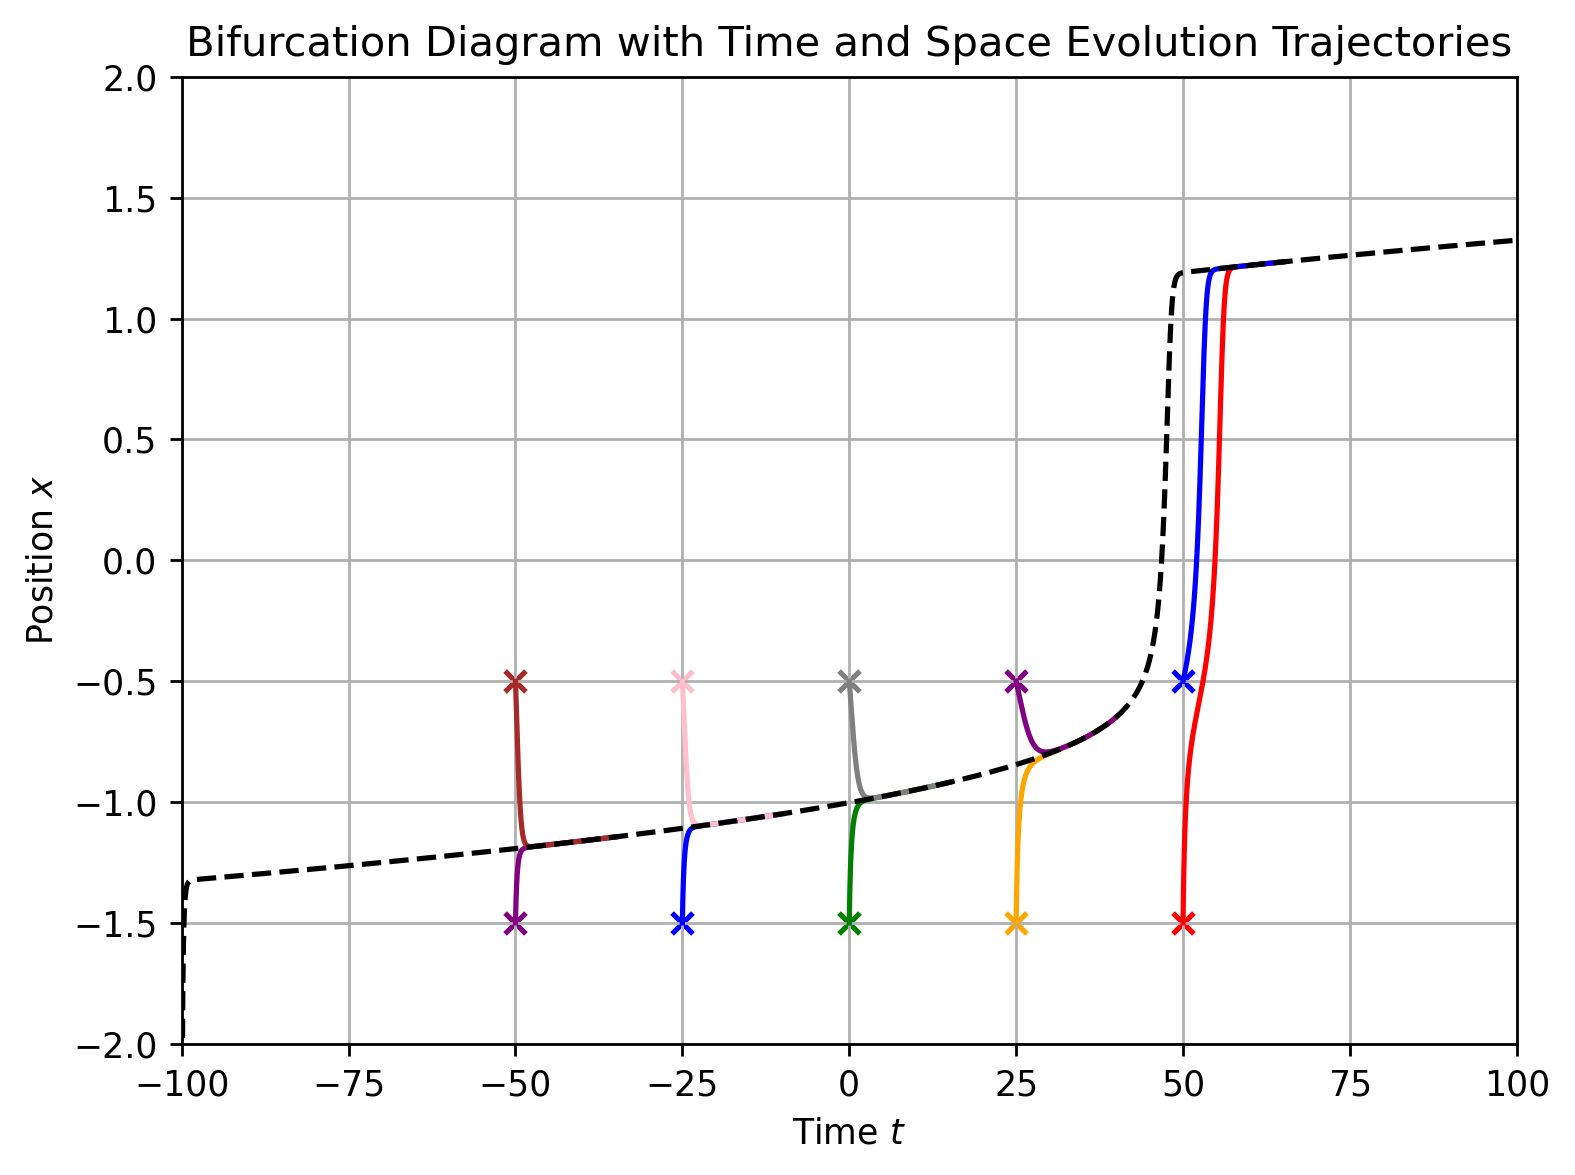

In [5]:
# Parameters for bifurcation diagram
mu_bifurcation = 0.01
g_bifurcation = 0
dt_bifurcation = 0.01
T_max_bifurcation = 15  

# Different initial conditions for both time and space
initial_positions = [-1.5, -0.5]  # Initial positions (space)
initial_times = np.array([-5.0, -2.5, 0.0, 2.5,5.0])*10  # Initial times (time)

# Plotting the bifurcation diagram with multiple time evolution trajectories
fig, ax = plt.subplots(dpi=250)

colors = ['purple', 'blue', 'green', 'orange', 'red', 'brown', 'pink', 'gray']  # Colors for different trajectories
color_index = 0  # Index to cycle through colors

# Loop over initial conditions for both time and space
for x0_bifurcation in initial_positions:
    for t0_bifurcation in initial_times:
        # Run the simulation for each combination of initial position and initial time
        x_traj_bifurcation, t_traj_bifurcation, _ = run_simulation(x0_bifurcation, t0_bifurcation, dt_bifurcation, T_max_bifurcation, mu_bifurcation, g_bifurcation)
        
        # Plot each trajectory with a different color
        ax.plot(t_traj_bifurcation, x_traj_bifurcation, label=f'x0={x0_bifurcation}, t0={t0_bifurcation}', color=colors[color_index % len(colors)])
        
        # Mark the starting and ending points
        ax.scatter(t_traj_bifurcation[0], x_traj_bifurcation[0], color=colors[color_index % len(colors)], marker='x')
        #ax.scatter(t_traj_bifurcation[-1], x_traj_bifurcation[-1], color='black', marker='o')
        
        # Update color index for the next trajectory
        color_index += 1

# Plotting
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title('Bifurcation Diagram with Time and Space Evolution Trajectories')
x_pb,t_pb,_ = run_simulation(x0=-5.0, t0=-100.0, dt=0.01, T_max=200, mu=mu_bifurcation, g=0)
ax.plot(t_pb,x_pb,label='t0->-infty',color='black',linestyle='dashed')
ax.set_xlim(-100,100)
ax.set_ylim(-2,2)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
ax.grid(True)
plt.tight_layout()
plt.show()


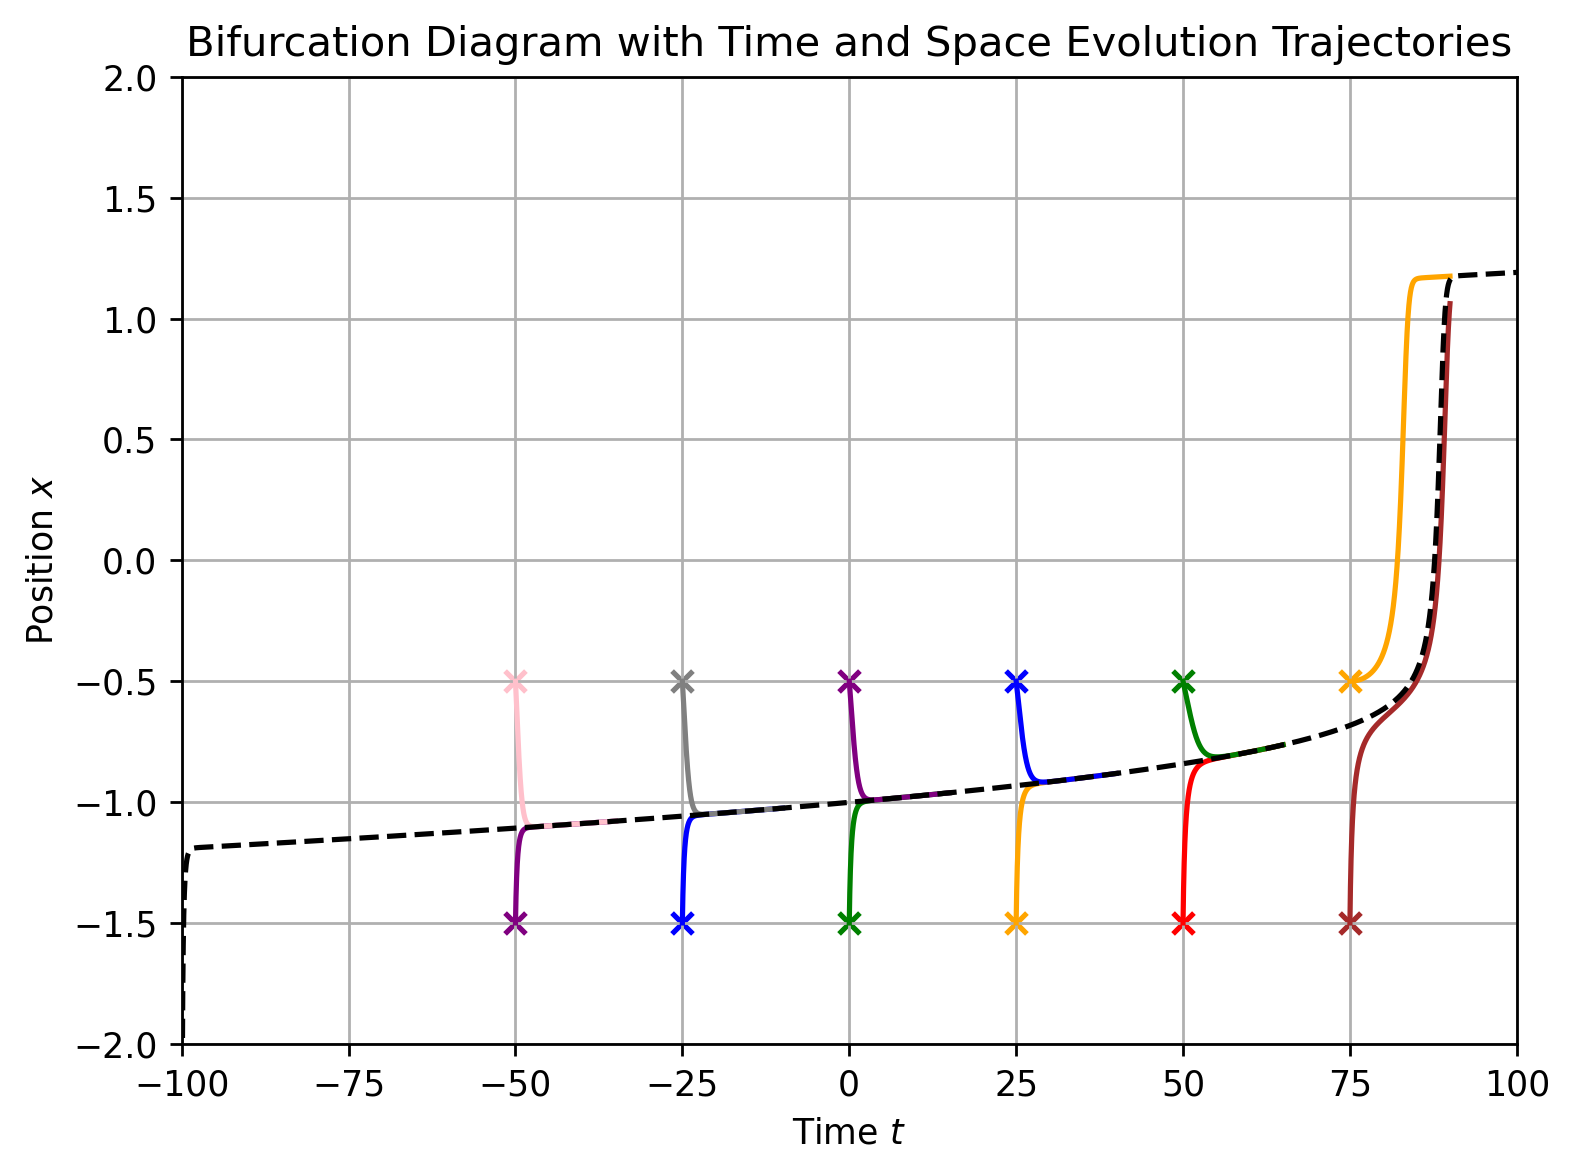

In [6]:
# Parameters for bifurcation diagram
mu_bifurcation = 0.005
g_bifurcation = 0
dt_bifurcation = 0.01
T_max_bifurcation = 15  

# Different initial conditions for both time and space
initial_positions = [-1.5, -0.5]  # Initial positions (space)
initial_times = np.array([-5.0, -2.5, 0.0, 2.5,5.0,7.5])*10  # Initial times (time)

# Plotting the bifurcation diagram with multiple time evolution trajectories
fig, ax = plt.subplots(dpi=250)

colors = ['purple', 'blue', 'green', 'orange', 'red', 'brown', 'pink', 'gray']  # Colors for different trajectories
color_index = 0  # Index to cycle through colors

# Loop over initial conditions for both time and space
for x0_bifurcation in initial_positions:
    for t0_bifurcation in initial_times:
        # Run the simulation for each combination of initial position and initial time
        x_traj_bifurcation, t_traj_bifurcation, _ = run_simulation(x0_bifurcation, t0_bifurcation, dt_bifurcation, T_max_bifurcation, mu_bifurcation, g_bifurcation)
        
        # Plot each trajectory with a different color
        ax.plot(t_traj_bifurcation, x_traj_bifurcation, label=f'x0={x0_bifurcation}, t0={t0_bifurcation}', color=colors[color_index % len(colors)])
        
        # Mark the starting and ending points
        ax.scatter(t_traj_bifurcation[0], x_traj_bifurcation[0], color=colors[color_index % len(colors)], marker='x')
        #ax.scatter(t_traj_bifurcation[-1], x_traj_bifurcation[-1], color='black', marker='o')
        
        # Update color index for the next trajectory
        color_index += 1

# Plotting
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title('Bifurcation Diagram with Time and Space Evolution Trajectories')
x_pb,t_pb,_ = run_simulation(x0=-5.0, t0=-100.0, dt=0.01, T_max=200, mu=mu_bifurcation, g=0)
ax.plot(t_pb,x_pb,label='t0->-infty',color='black',linestyle='dashed')
ax.set_xlim(-100,100)
ax.set_ylim(-2,2)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
ax.grid(True)
plt.tight_layout()
plt.show()


Estimate pullback attractor numerically

(21, 2, 40000)


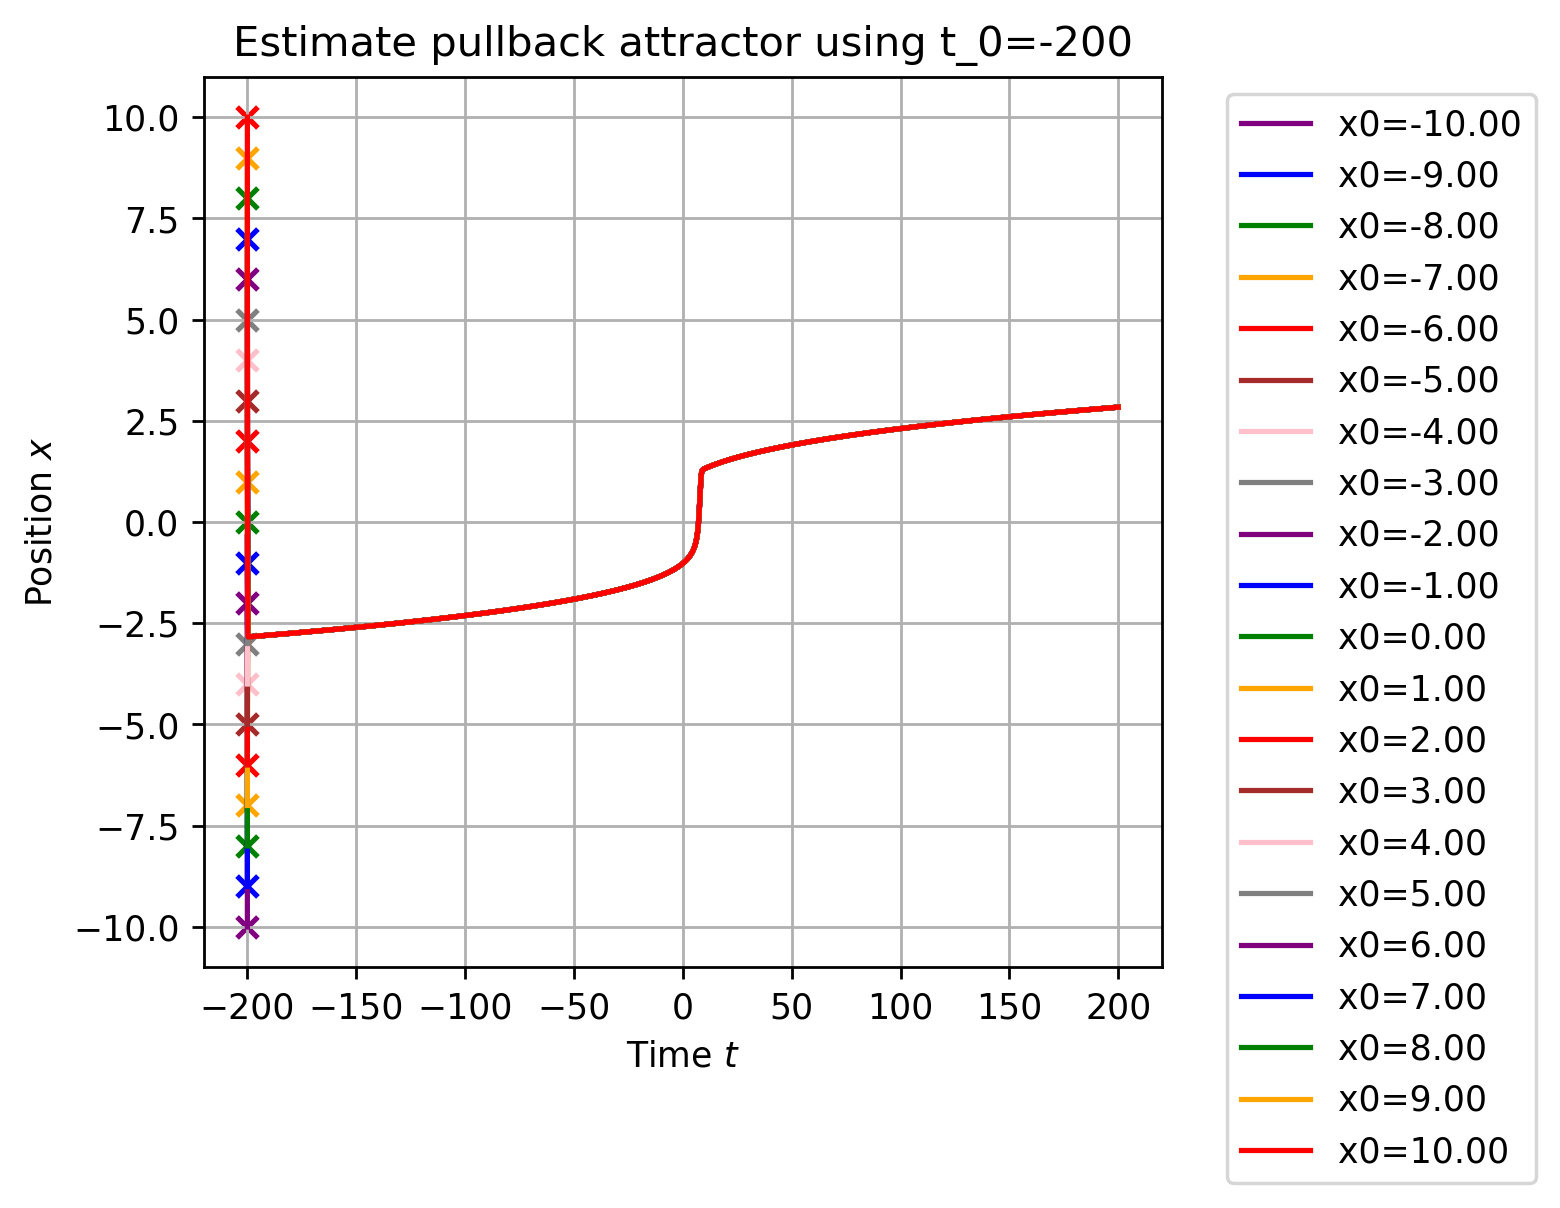

In [7]:
# Parameters for bifurcation diagram
mu = 0.1
g = 0
dt = 0.01
T_max = 400
t0=-200

# Different initial conditions for both time and space
initial_positions = np.linspace(-10,10,21)  # Initial positions (space)

# Plotting the bifurcation diagram with multiple time evolution trajectories
fig, ax = plt.subplots(dpi=250)

colors = ['purple', 'blue', 'green', 'orange', 'red', 'brown', 'pink', 'gray']  # Colors for different trajectories
color_index = 0  # Index to cycle through colors

trajectories_PB=[]

# Loop over initial conditions for both time and space
for i,x0 in enumerate(initial_positions):
    # Run the simulation for each initial position 
    x_traj, t_traj, _ = run_simulation(x0, t0, dt, T_max, mu, g)
    trajectories_PB.append([x_traj,t_traj])
    
    # Plot each trajectory with a different color
    ax.plot(t_traj, x_traj, label=f'x0={x0:.2f}', color=colors[color_index % len(colors)])
    
    # Mark the starting and ending points
    ax.scatter(t_traj[0], x_traj[0], color=colors[color_index % len(colors)], marker='x')
    
    # Update color index for the next trajectory
    color_index += 1

trajectories_PB=np.array(trajectories_PB)
print(trajectories_PB.shape)

# Plotting
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title(f'Estimate pullback attractor using t_0={t0}')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
#ax.set_xlim(-20,25)
#ax.set_ylim(-2,2)
ax.grid(True)
plt.tight_layout()
plt.show()


Average all trajectories, should represent PB-attractor in the range [-20,25]

C:\Users\faabt\AppData\Local\Temp\ipykernel_13556\847117344.py:11: RankWarning: Polyfit may be poorly conditioned
  p=np.polyfit(pullback_estimate[1,:],pullback_estimate[0,:],deg=40)


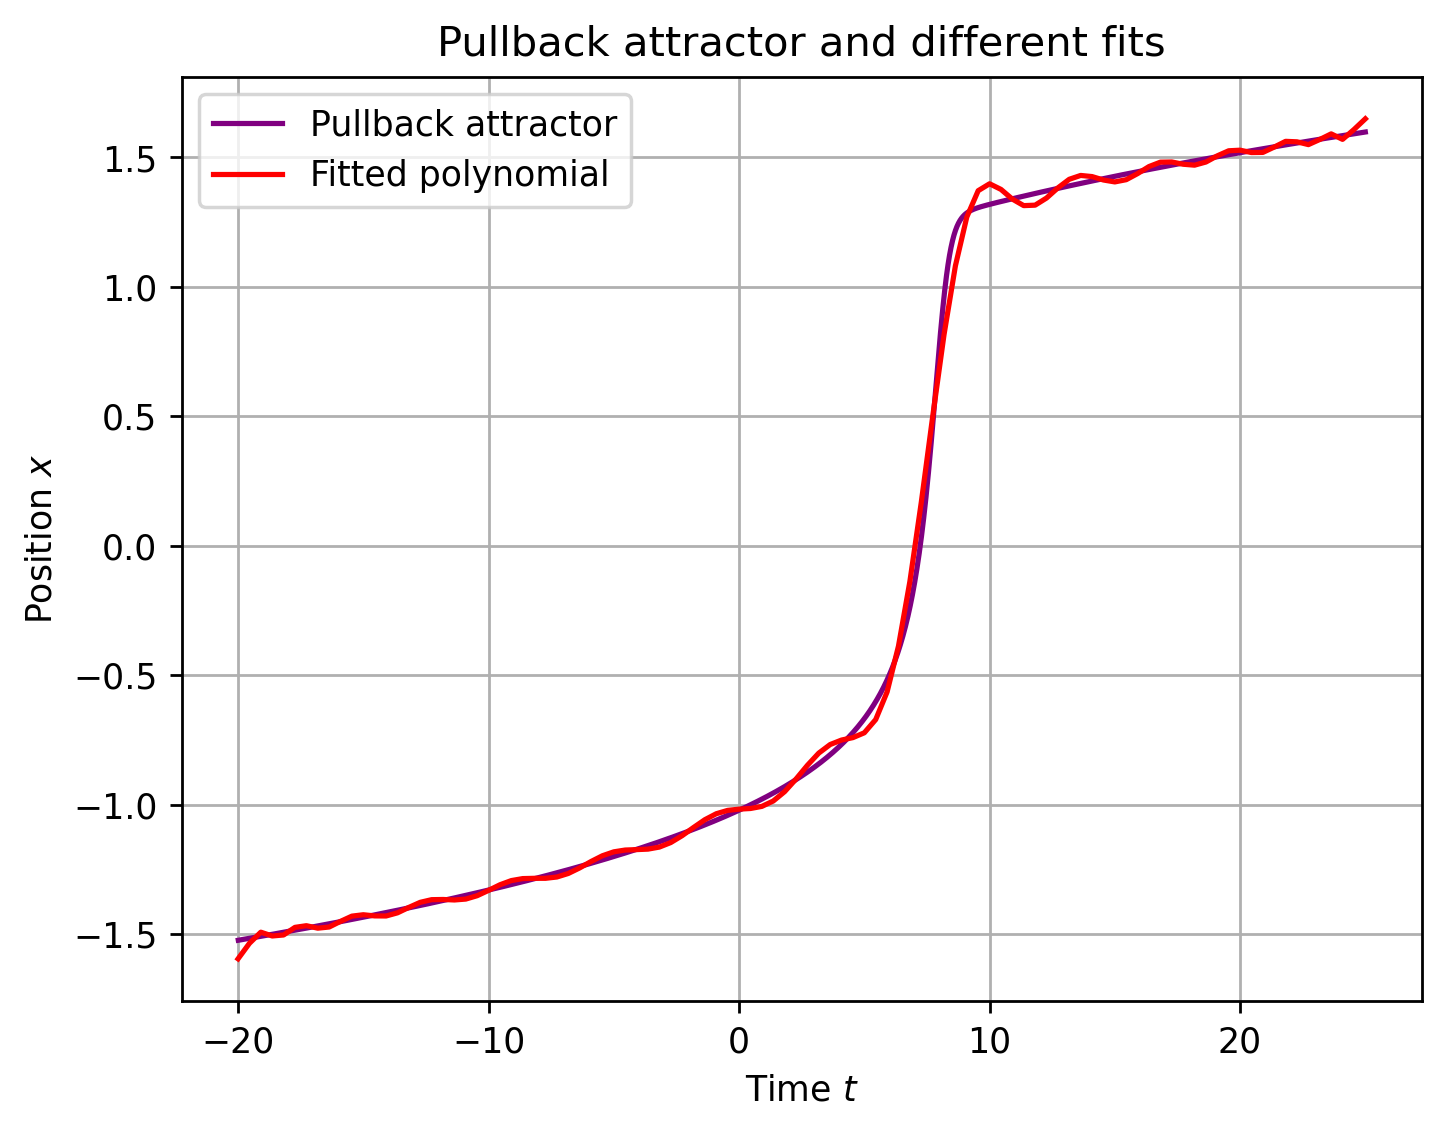

In [8]:
#average over all simulated trajectories
pullback_estimate=np.mean(trajectories_PB,axis=0)

# restrict to the range [-20,25]
pullback_estimate=pullback_estimate[:,(pullback_estimate[1,:]>-20) & (pullback_estimate[1,:]<25)]

#plot
fig, ax = plt.subplots(dpi=250)
ax.plot(pullback_estimate[1,:],pullback_estimate[0,:],label='Pullback attractor',color='purple')

p=np.polyfit(pullback_estimate[1,:],pullback_estimate[0,:],deg=40)
x=np.linspace(-20,25,100)
y=np.polyval(p,x)
ax.plot(x,y,label='Fitted polynomial',color='red')

def predict(t,t_traj,x_traj):
    return x_traj[np.argmin(np.abs(t_traj-t))]
times=np.linspace(-20,25,50)
x_predict=[predict(t,pullback_estimate[1,:],pullback_estimate[0,:]) for t in times]
#plt.scatter(times,x_predict,label='Fit by array comparison',color='lime')

ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Position $x$')
ax.set_title(f'Pullback attractor and different fits')
ax.legend()
ax.grid(True)
plt.show()